### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. Using this data to demonstrate EDA,visualizations, merge and groupby methods in Pandas.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. 

    - Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

    - Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. 

    - Columns: user id, age, gender, occupation, zip code

### Objective:

- To show the trend in popularity of genres over the years
- To find the Top 25 movies from average ratings 
- What is the gender distribution across different genres


### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`



In [1]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/My Drive/Colab Notebooks/UTA_AIML/Movie_Lens/'

Mounted at /content/drive


#### 1. Import the necessary packages and read in the datasets into dataframes

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
pd.options.display.float_format = '{:,.2f}'.format  

In [3]:
rating  = pd.read_csv(DATA_PATH+'Data.csv')    # Columns are user id	movie id	rating	timestamp
movie = pd.read_csv(DATA_PATH+'item.csv')    # Movie id, rating, genres, release date, rating info
user  = pd.read_csv(DATA_PATH+'user.csv')    # user id	age, gender, occupation, zip code

In [4]:
print(rating.info())
print(rating.shape) 
print(rating.describe())
print(rating.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
(100000, 4)
         user id   movie id     rating      timestamp
count 100,000.00 100,000.00 100,000.00     100,000.00
mean      462.48     425.53       3.53 883,528,851.49
std       266.61     330.80       1.13   5,343,856.19
min         1.00       1.00       1.00 874,724,710.00
25%       254.00     175.00       3.00 879,448,709.50
50%       447.00     322.00       4.00 882,826,944.00
75%       682.00     631.00       4.00 888,259,984.00
max       943.00   1,682.00       5.00 893,286,638.00
user id      0
movie id     0
rating       0
timestamp    0
dtype: int64


In [5]:
print(movie.info())
print(movie.shape)
print(movie.describe())
print(movie.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [6]:
print(user.info())
print(user.shape)
print(user.describe())
print(user.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
(943, 5)
       user id    age
count   943.00 943.00
mean    472.00  34.05
std     272.36  12.19
min       1.00   7.00
25%     236.50  25.00
50%     472.00  31.00
75%     707.50  43.00
max     943.00  73.00
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


#### 4. The number of movies per genre 

In [8]:
# using sum 
movie_genres = ['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movie['num_of_genre'] = movie[movie_genres].sum(axis=1)

In [10]:
movie.sample(3)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_of_genre
1305,1307,Carmen Miranda: Bananas Is My Business,01-Jan-1994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1566,1568,Vermont Is For Lovers,01-Jan-1992,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2
1229,1231,Marked for Death,01-Jan-1990,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2


#### 5. Movies that have more than one genre 

In [13]:
#Show movies with more than 1 genre
movie[movie['num_of_genre'] > 1]    # 849 movies are included in more than one genre

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_of_genre
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,3
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2


In [ ]:
#movie.drop(['sum_genre'], axis=1)  # to get the original frame back if ones wants, I left it there

#### 6. Drop the movie where the genre is unknown 

In [14]:
movie = movie[movie['unknown'] !=1]


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' 

In [ ]:
# Using distplot for age and countplot for gender,ratings,occupation. Use lineplot or countplot for release year.
# To get to release year from release date using str.split()
# convert it to pandas datetime format and extract year  by (.dt.year) or slicing the string

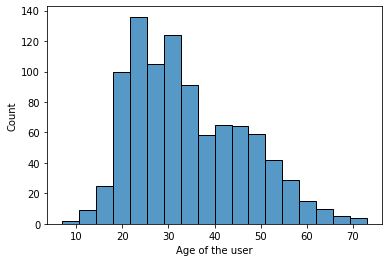

In [17]:
# distplot for age
x =pd.Series(user['age'], name="Age of the user")
sns.histplot(x)    # Most movie were seen by ages 20-50 years

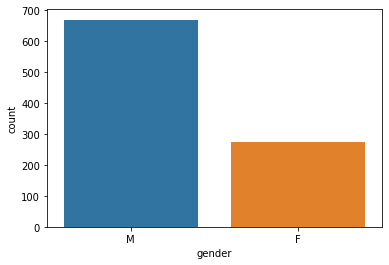

In [18]:
#countplot for gender
sns.countplot(x=user['gender'])    # >50% more males watch movie than females

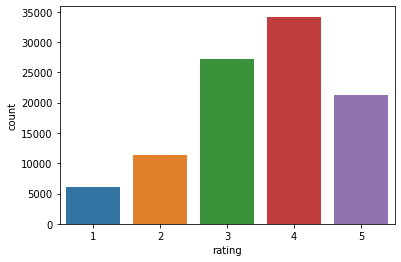

In [19]:
#countplot for ratings
sns.countplot(x=rating['rating'])  #Most ratings fall between 3-4

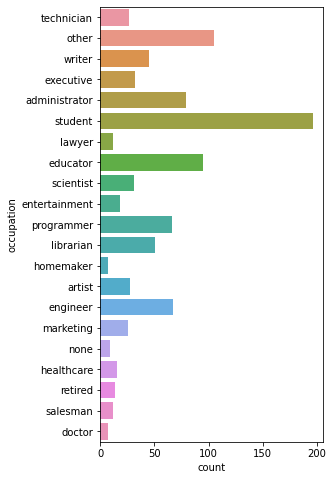

In [20]:
#countplot for occupation
plt.figure(figsize=(4,8)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(y="occupation", data=user)
plt.show()
# Students have watched and rated most movies

In [16]:
#Getting release year from release date by using lambda function and slicing the string
movie['release year'] = movie.apply(lambda x:x['release date'][-4:], axis=1)

#Print and show an example output for last 5 rows
print(movie['release year'][-5:-1])

1676    1998
1677    1998
1678    1998
1679    1994
Name: release year, dtype: object


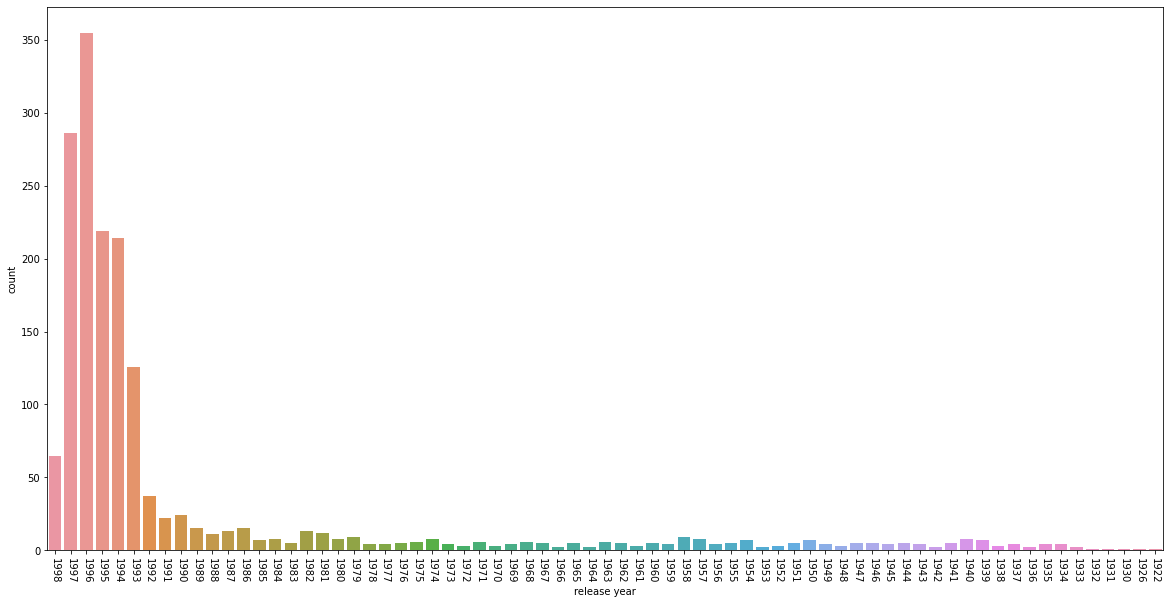

In [24]:
# countplot for release year *shows the number of movies released per year after 1993 is >50*
plt.figure(figsize=(20,10))
plt.xticks(rotation=-90)
sns.countplot(x=movie['release year'].sort_values(ascending=False))

### 8. Visualizing how the popularity of genres has changed over the years 

Using the number of releases in a year as a parameter of popularity of a genre

1: Creating a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre).

2: Using groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [26]:
# creating a dataframe with release year(rows) and genre(colums) and values are counts of movies in that year 

genre_by_yr = movie.groupby(by=['release year'])['Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'].sum()

genre_by_yr.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


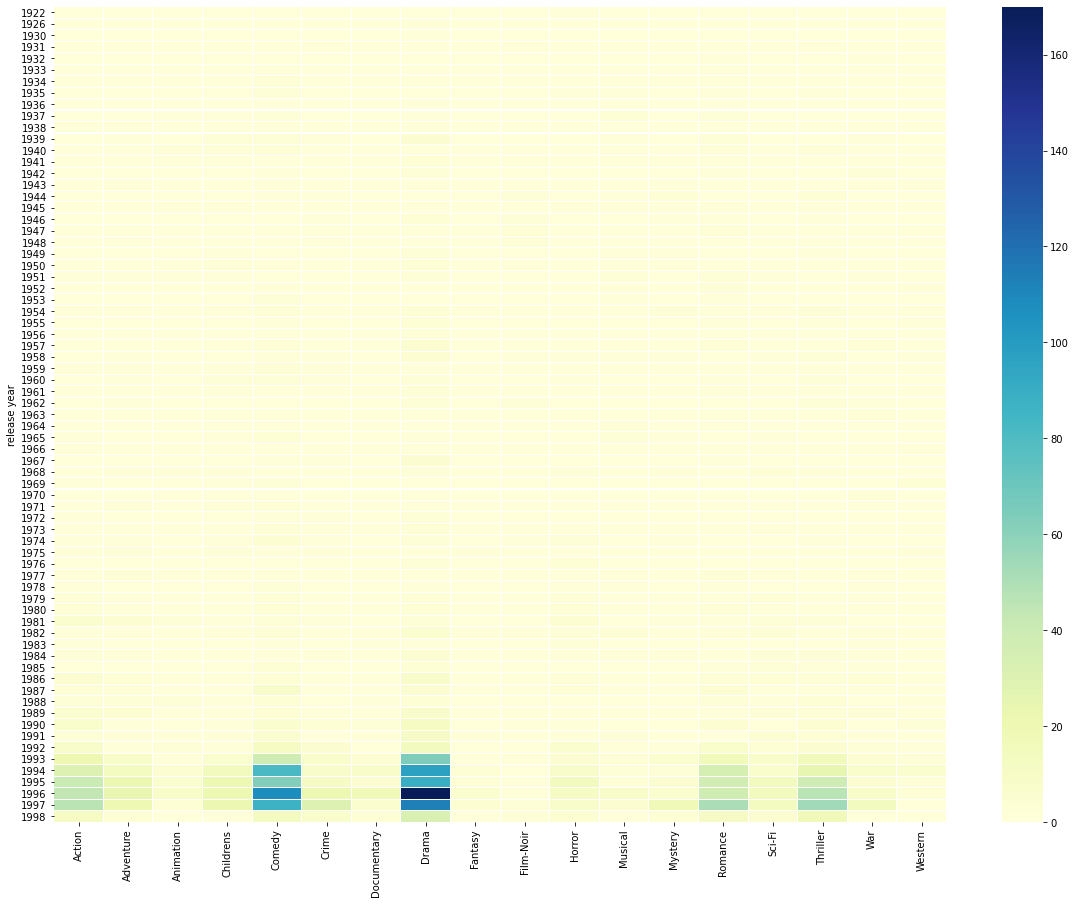

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(genre_by_yr, cmap="YlGnBu", linewidths=.05)  # heatmap
plt.show()

In [28]:
genre_by_yr['Total'] = genre_by_yr.sum(axis=1).values
# Calculating total of each year and forming a new column for it

genre_by_yr = round(genre_by_yr.div(genre_by_yr['Total'], axis= 0) * 100,2).drop('Total',axis=1).T

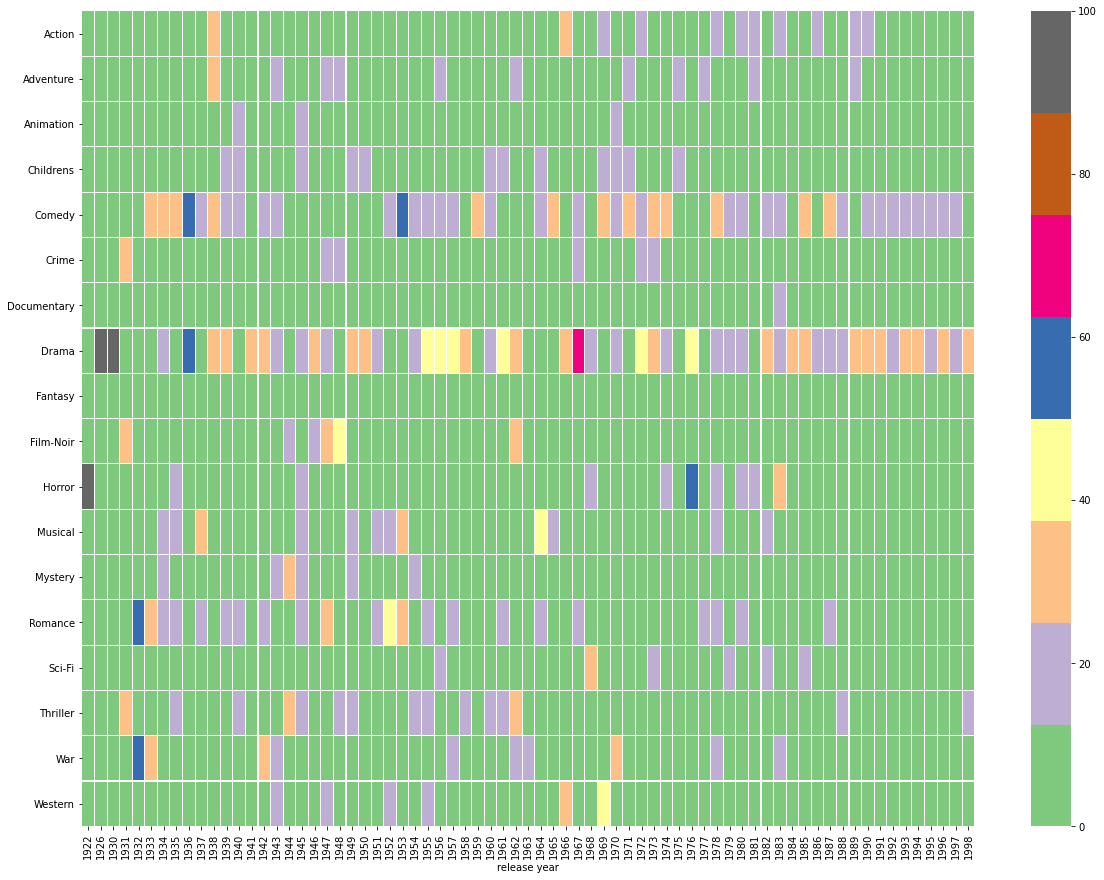

In [29]:
# Diving each row by its total to calculate percentages
# round is used to round off decimal numbers upto 2 places
# 'Total' column has been dropped
# .T is used to change rows into columns and columns into rows
plt.figure(figsize=(20,15))
sns.heatmap(genre_by_yr, cmap="Accent", linewidths=.05)  # heatmap
plt.show()

### 9. Finding the top 25 movies according to average ratings such that each movie has no. of ratings more than 100 

Method : 
1. Find the movies that have more than 100 ratings(using groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. 
3. Using isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
4. Will use the .merge() function to get the movie titles.

Note: You can find more on groupby on https://realpython.com/pandas-groupby/.

In [33]:
# List of movie ids having count of ratings more than 100 
movie_count = rating.groupby('movie id')['rating'].count()
movie_count = movie_count[movie_count>100]

# Finding average ratings for each movie and sorting them out in descending order
movie_ratings = rating.groupby('movie id')['rating'].mean().sort_values(ascending=False)

# Slicing average rating based movie ids having count of ratings more than 100
## Displaying top 25 rows only
movie_ratings[movie_ratings.index.isin(movie_count.index)].reset_index().head(25).merge(movie[['movie id', 'movie title']],on='movie id',how='left')

,movie id,rating,movie title
0,408,4.49,"Close Shave, A"
1,318,4.47,Schindler's List
2,169,4.47,"Wrong Trousers, The"
3,483,4.46,Casablanca
4,64,4.45,"Shawshank Redemption, The"
5,603,4.39,Rear Window
6,12,4.39,"Usual Suspects, The"
7,50,4.36,Star Wars
8,178,4.34,12 Angry Men
9,134,4.29,Citizen Kane


### 10. See gender distribution across different genres 

* Do men watch more drama than women
* Do women watch more Sci-Fi than men
* Do men watch more romance movies than women

**comparing the percentages**



1. Using the .sum(), .div() function here.
2. Using number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [191]:
# merging on all datasets to get one dataframe
udf  = user.merge(rating,on='user id',how='inner')
df = movie.merge(udf,on='movie id',how='inner')
df.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_of_genre,release year,user id,age,gender,occupation,zip code,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,1,24,M,technician,85711,5,874965758
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,2,53,F,other,94043,4,888550871
2,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,5,33,F,other,15213,4,875635748
3,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,6,42,M,executive,98101,4,883599478
4,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,10,53,M,lawyer,90703,4,877888877


In [192]:
Genre_by_gender = df.groupby('gender').sum().loc[:,'Action':'Western'] 

In [193]:
Genre_by_gender['total'] = df['gender'].value_counts()  #Row total of the dataframe

In [194]:
Genre_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,25738
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,74252


In [195]:
Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100  #dividing each cell with row total and multiplying by 100

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,21.14,12.20,3.87,8.67,31.35,6.97,0.73,42.77,1.41,1.50,4.65,5.60,5.11,22.76,10.21,19.76,8.50,1.44,100.00
M,27.13,14.29,3.52,6.67,29.31,8.43,0.77,38.90,1.33,1.82,5.55,4.73,5.29,18.32,13.60,22.61,9.71,2.00,100.00


#### Some Conclusions:




1. Of all the ratings given by women 43% were for Drama movies and for men it was 39%. Women watch more Drama

2. Of all the ratings given by women 10% were for Sci-FI movies and for men it was 14%. Therefore more men watch more Sci-Fi movies than women

3. Of all the ratings given by women 23% were for Drama movies and for men it was 18%. Therefore more women watch Romance movies